In [1]:
import os
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
# import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 0. Preparations

In [3]:
def test_stationarity(timeseries):
#     print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    print(test_stationarity(y))
        
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')

        ts_ax.set_title('Original')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [8]:
path = 'C:/Users/Igor/Learning/Machine Learning/Netology/3. TimeSeries/2 lecture'
data = next(os.walk(f'{path}/Series'), (None, None, []))[2]

class to_static:
    def __init__(self, index):
        self.init_series = pd.read_csv(f'{path}\\Series\\{data[index]}').iloc[:, 1]
        self.transf_series = self.init_series
        tsplot(self.init_series)
        
    def checker(self, func, *args):
        temp_series = pd.Series(func(*args)).dropna()
        p_orig = test_stationarity(args[0])[1]
        p_transf = test_stationarity(temp_series)[1]
        
        assert temp_series.nunique() > 1, 'You\'ve reached singular matrix. This transformation would be excessive, last one saved'

        assert p_transf < p_orig, 'P-value didnt improve'
        
        return temp_series
        
    def norm_Dx(self):
        func = boxcox
        
        self.transf_series = self.checker(func, self.transf_series, 0)
        tsplot(self.transf_series)
        
    def clear_trend(self):
        func = np.diff
        
        self.transf_series = self.checker(func, self.transf_series, 1)
        tsplot(self.transf_series)
    
    def clear_seasonality(self, season):
        func = np.diff

        self.transf_series = self.checker(func, self.transf_series, season)
        tsplot(self.transf_series)

# DataSet 0

Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


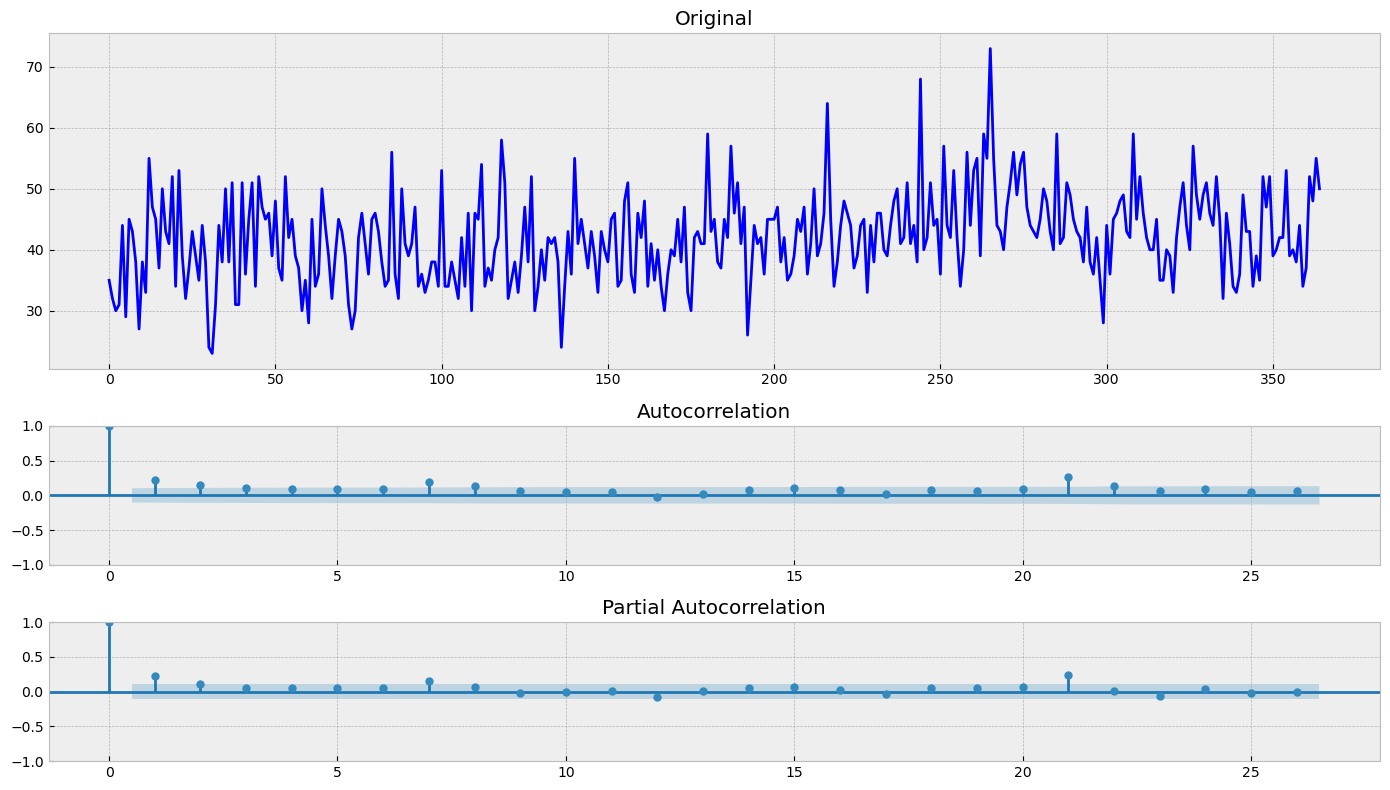

In [9]:
d0 = to_static(0)

In [10]:
d0.norm_Dx()

AssertionError: P-value didnt improve

Test Statistic                -1.262518e+01
p-value                        1.547240e-23
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


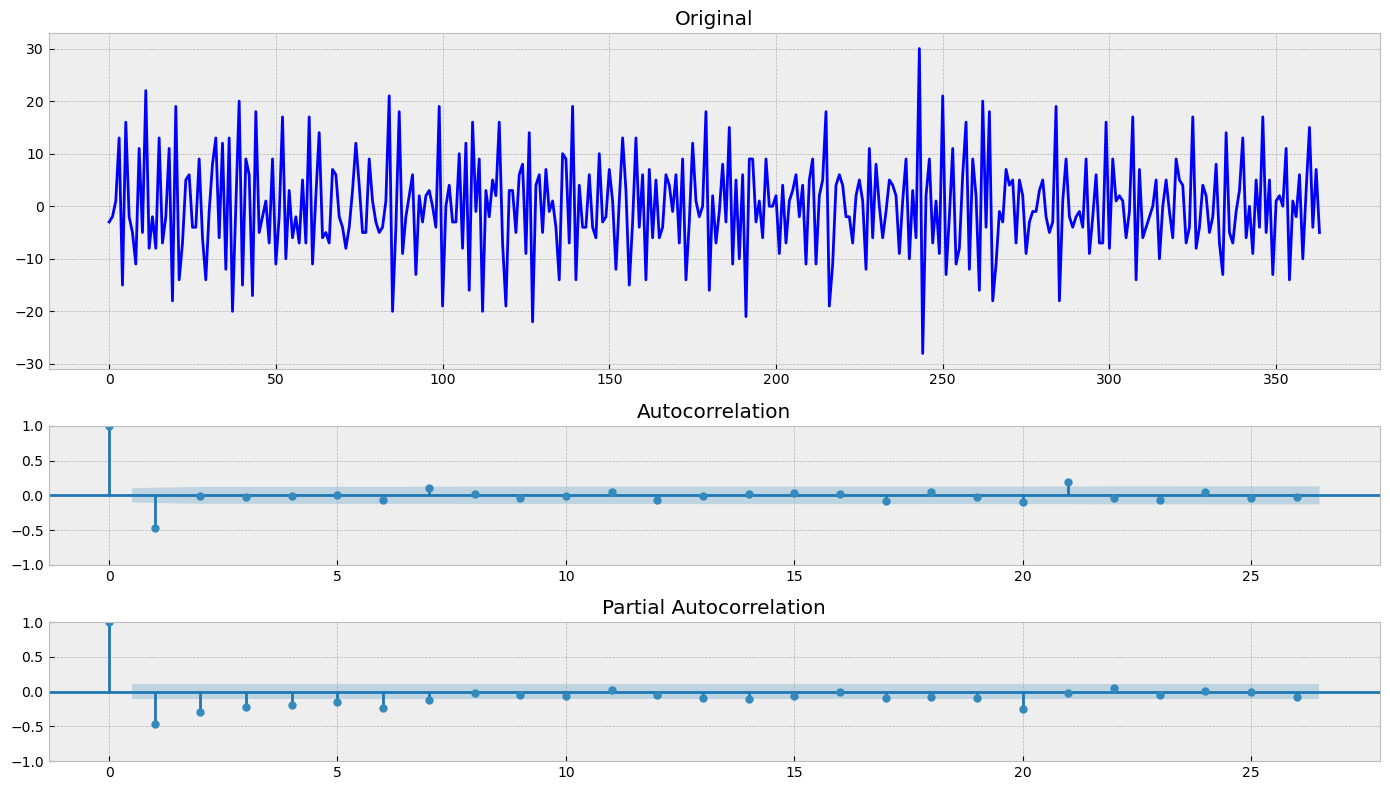

In [11]:
d0.clear_trend()

Test Statistic                 -19.920980
p-value                          0.000000
#Lags Used                      17.000000
Number of Observations Used    334.000000
Critical Value (1%)             -3.450081
Critical Value (5%)             -2.870233
Critical Value (10%)            -2.571401
dtype: float64


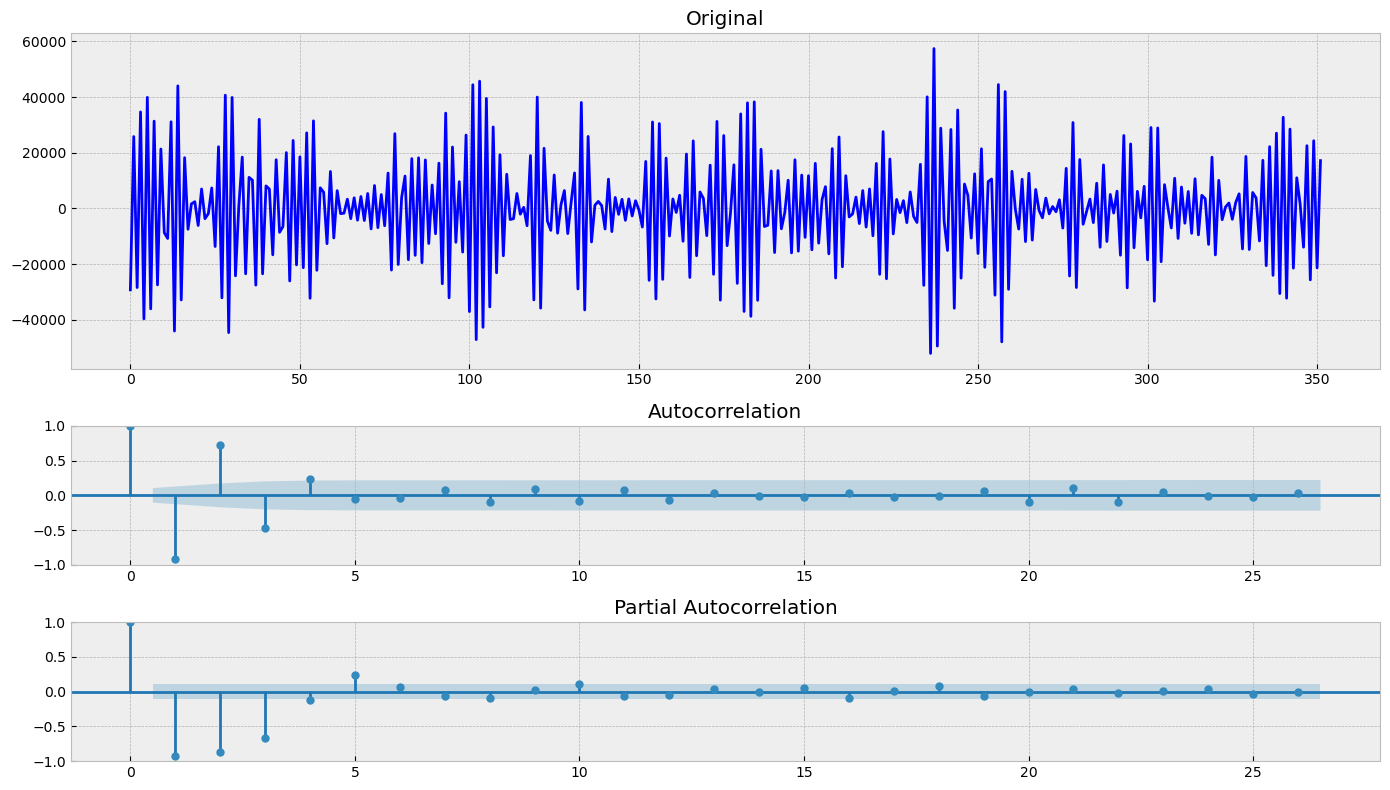

In [12]:
d0.clear_seasonality(12)

In [16]:
pd.DataFrame(d0.transf_series).to_csv('Static_series.csv')

## Это нормально? 0_о

# DataSet 1

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


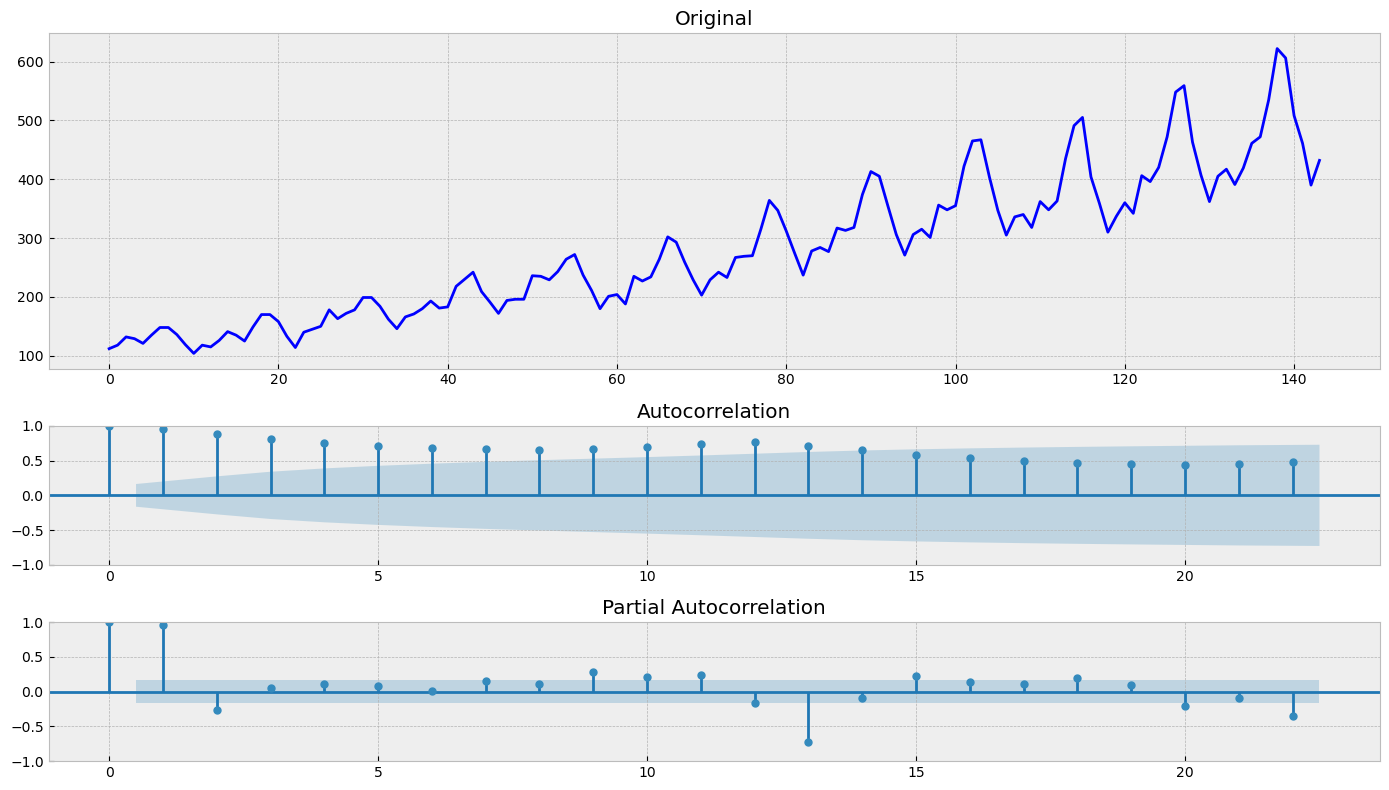

In [157]:
d1 = to_static(1)

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


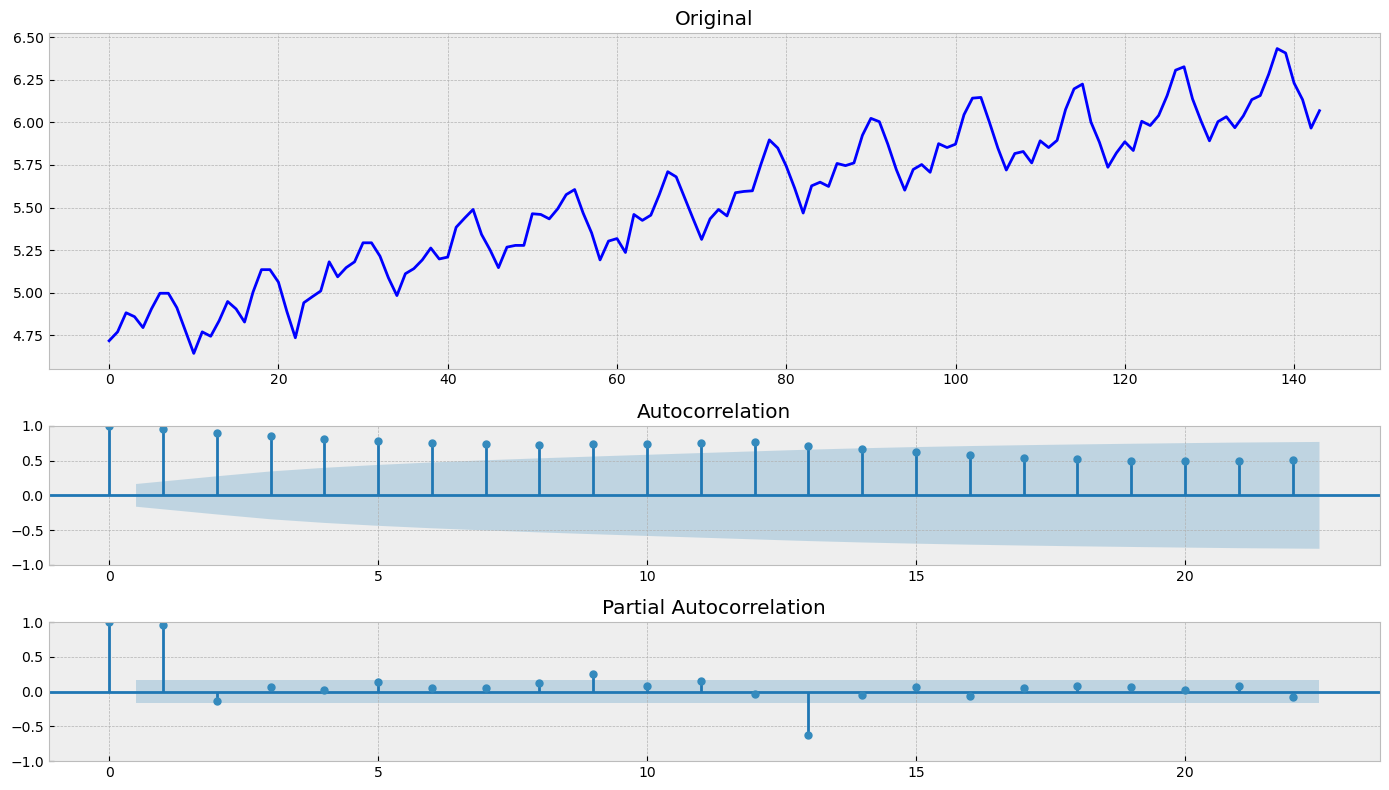

In [158]:
d1.norm_Dx()

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


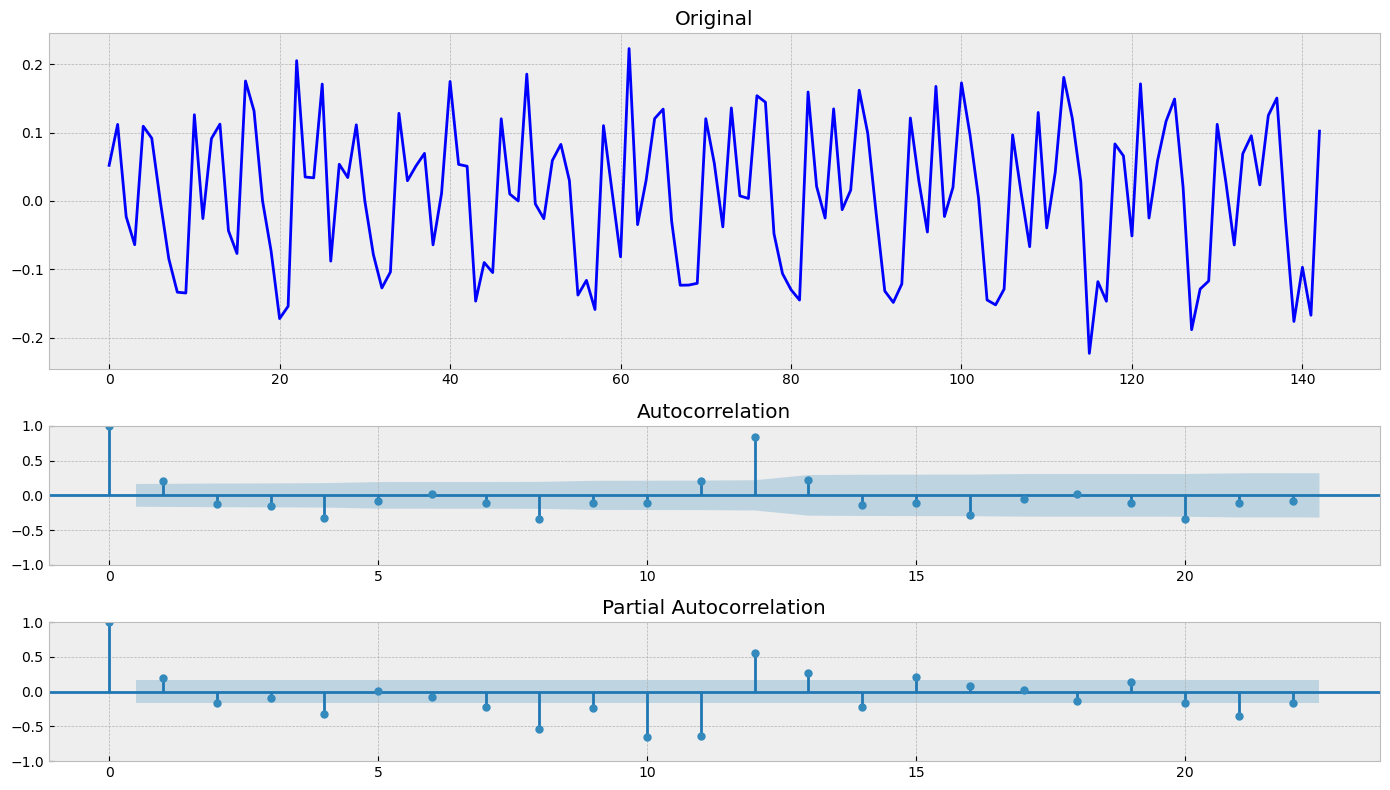

In [159]:
d1.clear_trend()

Test Statistic                 -22.209661
p-value                          0.000000
#Lags Used                      13.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


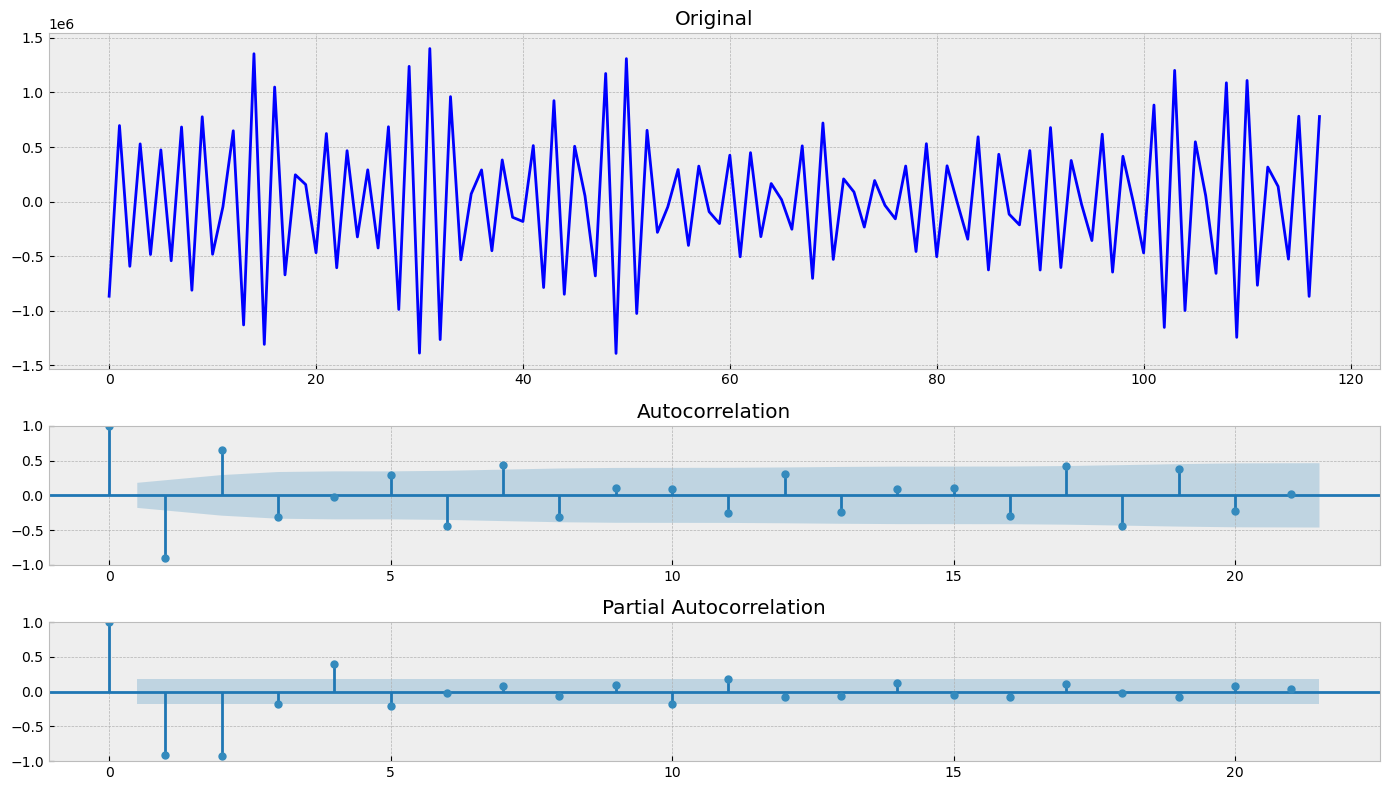

In [161]:
d1.clear_seasonality(12)

# DataSet 2

Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


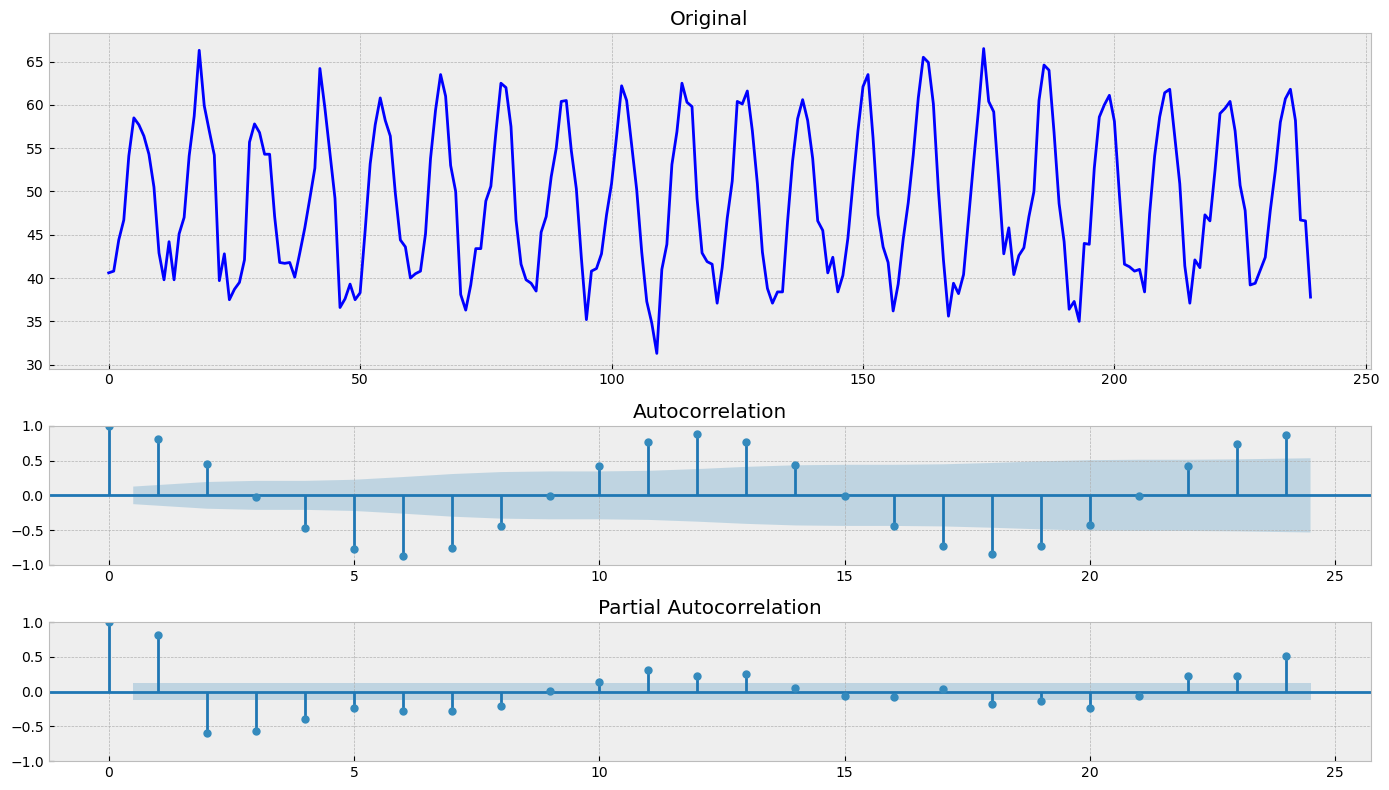

In [200]:
d2 = to_static(2)

Test Statistic                -1.514259e+01
p-value                        6.976806e-28
#Lags Used                     1.500000e+01
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


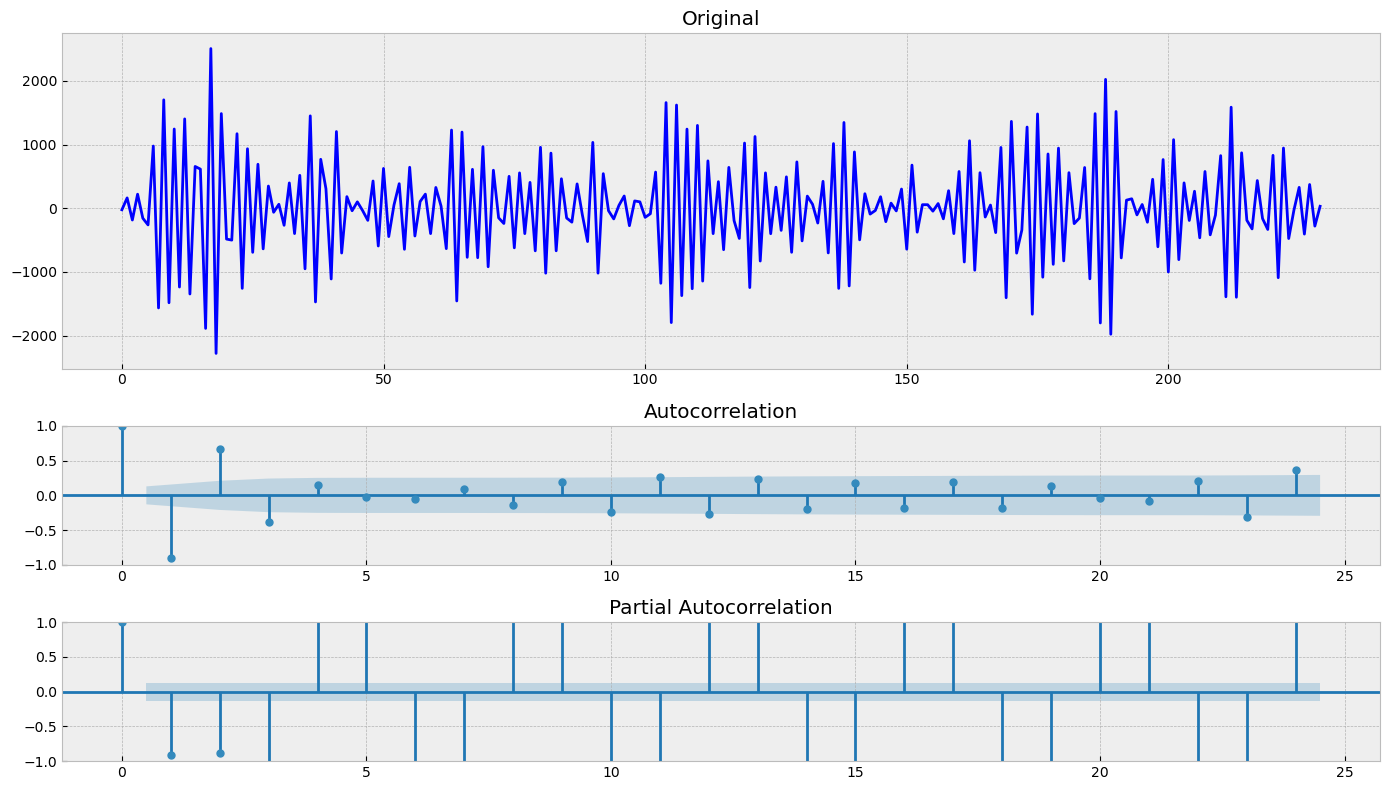

In [201]:
d2.clear_seasonality(10)

Test Statistic                -1.673398e+01
p-value                        1.375675e-29
#Lags Used                     1.500000e+01
Number of Observations Used    2.130000e+02
Critical Value (1%)           -3.461429e+00
Critical Value (5%)           -2.875207e+00
Critical Value (10%)          -2.574054e+00
dtype: float64


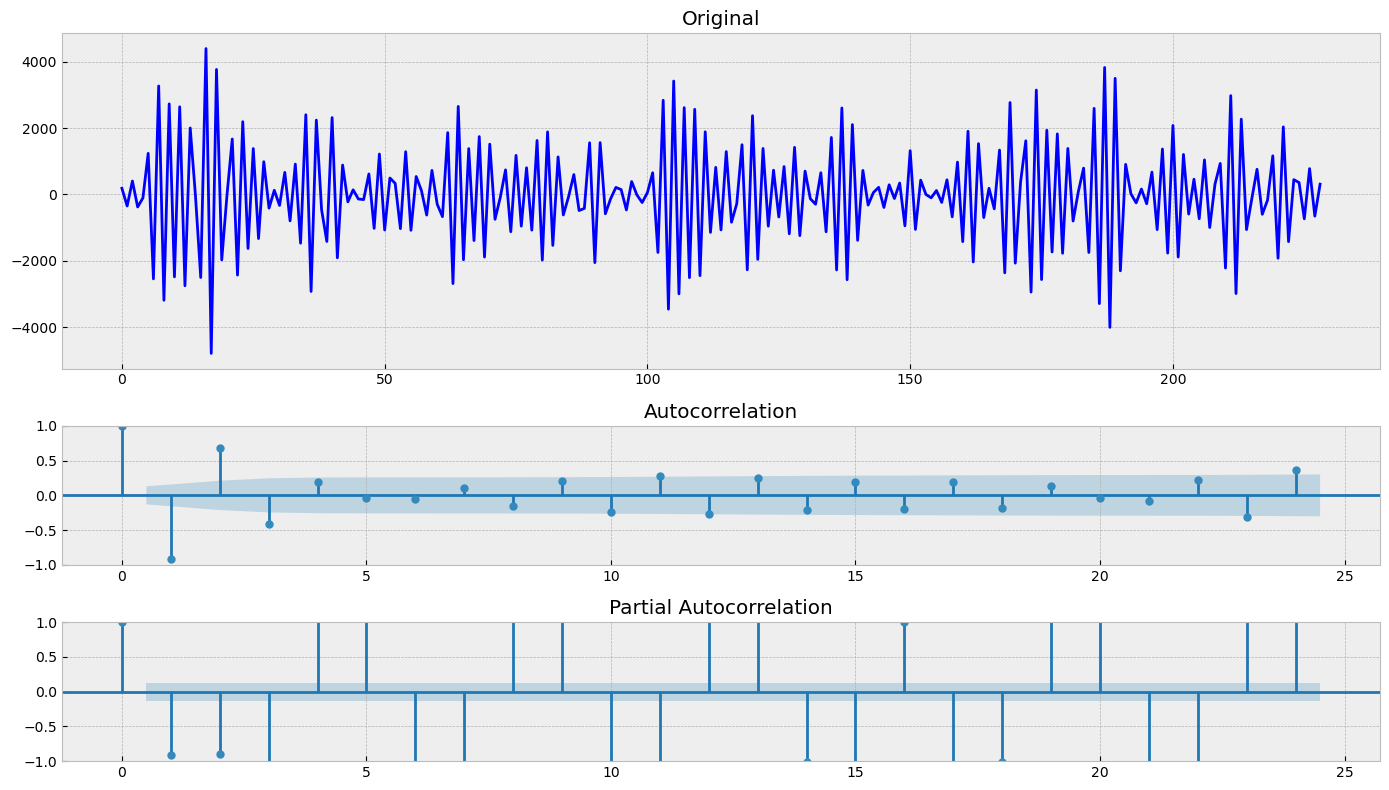

In [202]:
d2.clear_trend()

# DataSet 3

Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


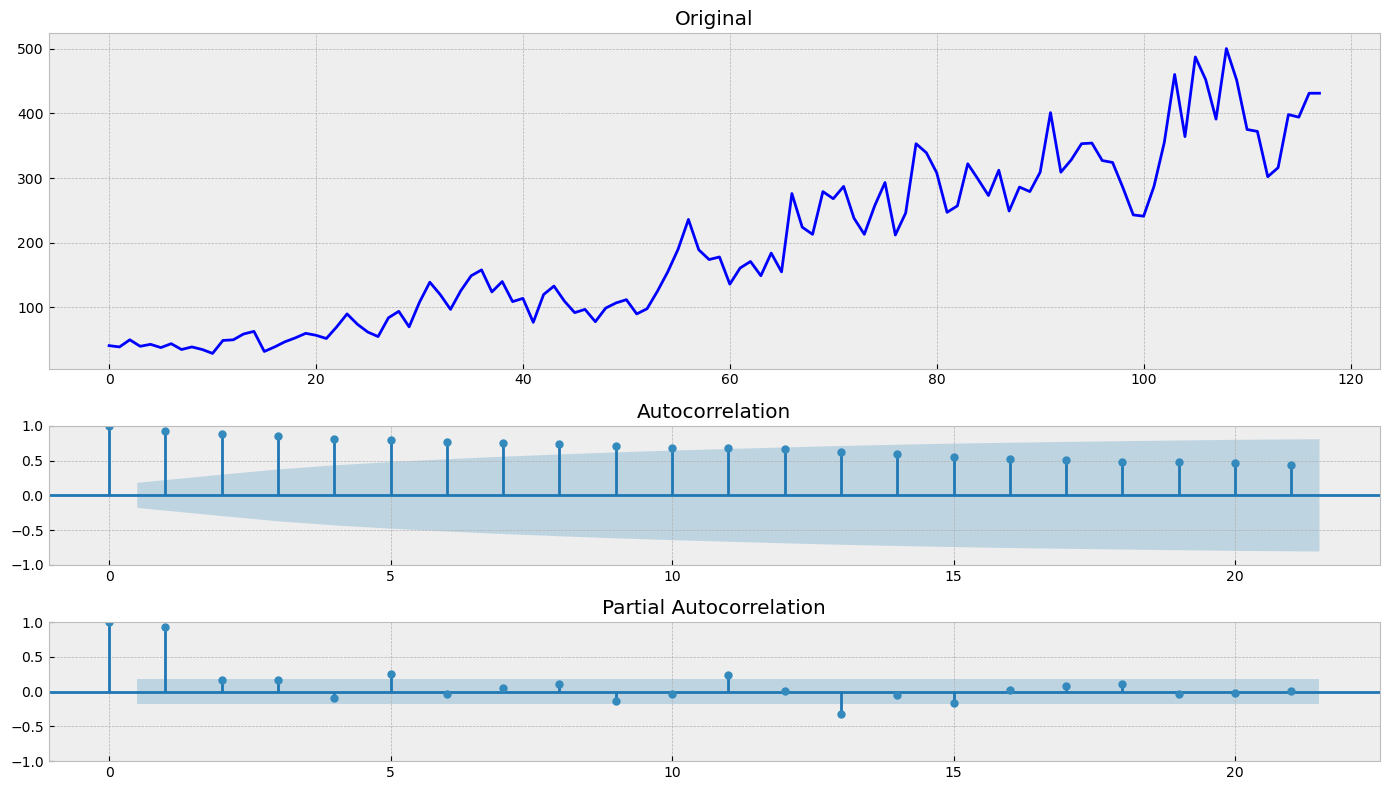

In [213]:
d3 = to_static(3)

Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


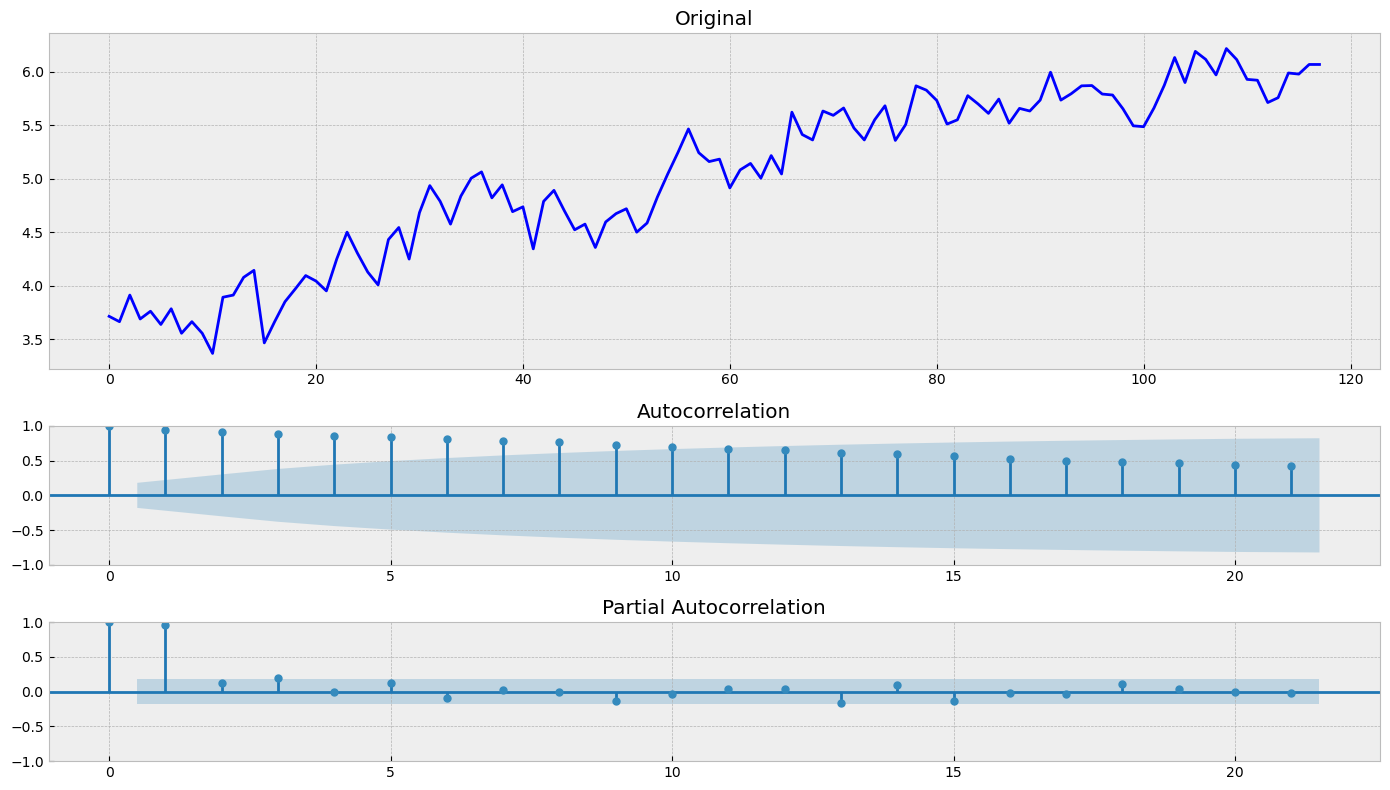

In [214]:
d3.norm_Dx()

Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


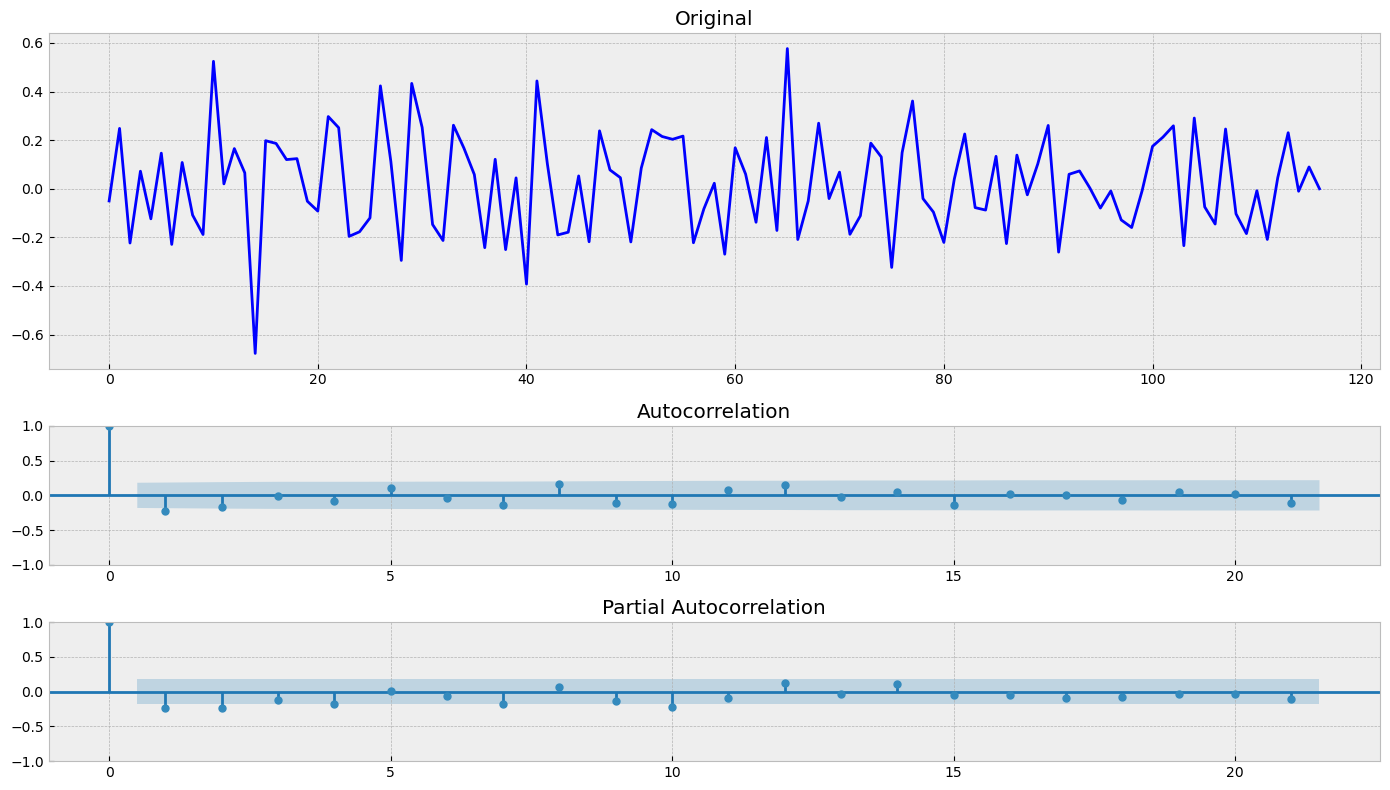

In [215]:
d3.clear_trend()

Test Statistic                -1.797991e+01
p-value                        2.777094e-30
#Lags Used                     1.100000e+01
Number of Observations Used    5.700000e+01
Critical Value (1%)           -3.550670e+00
Critical Value (5%)           -2.913766e+00
Critical Value (10%)          -2.594624e+00
dtype: float64


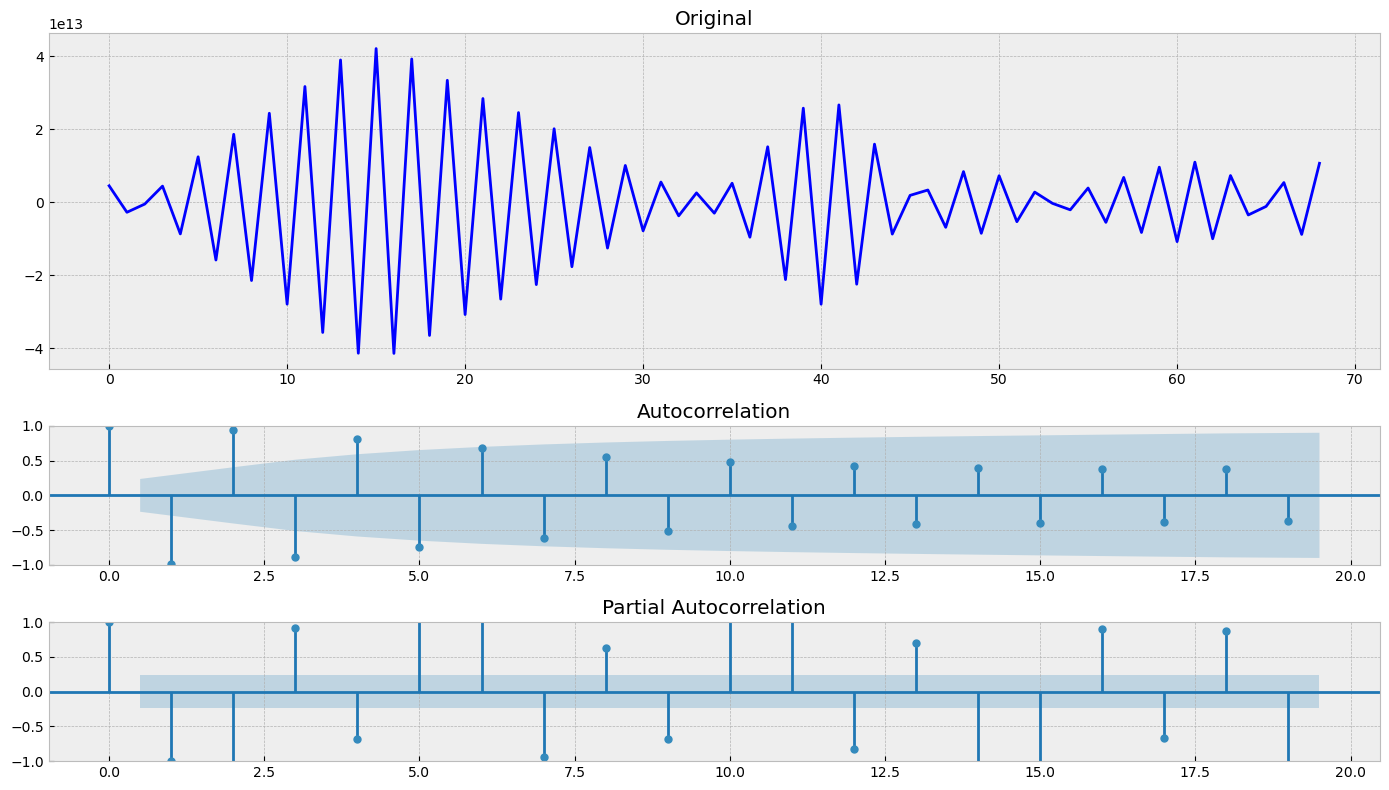

In [217]:
d3.clear_seasonality(24)

# DataSet 4

Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


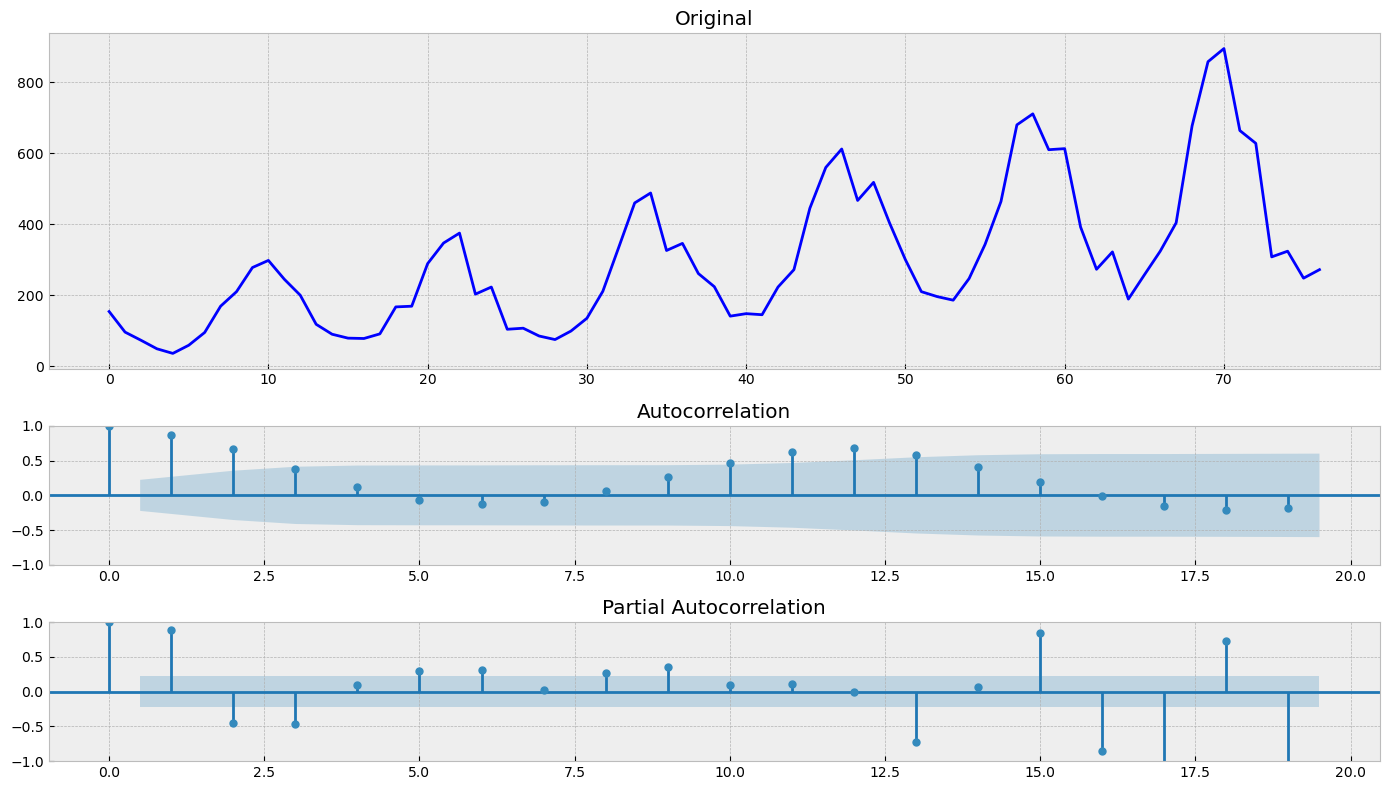

In [229]:
d4 = to_static(4)

Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


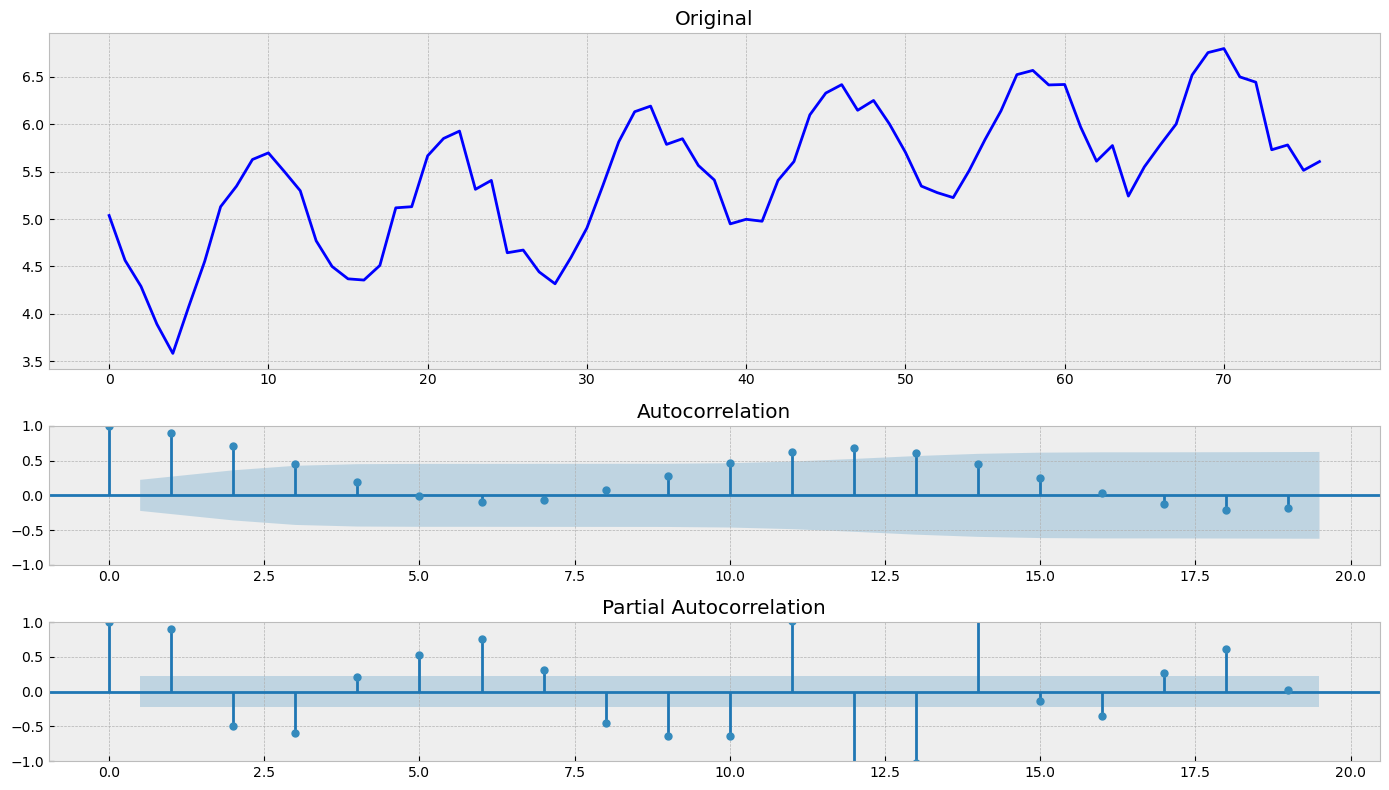

In [230]:
d4.norm_Dx()

Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


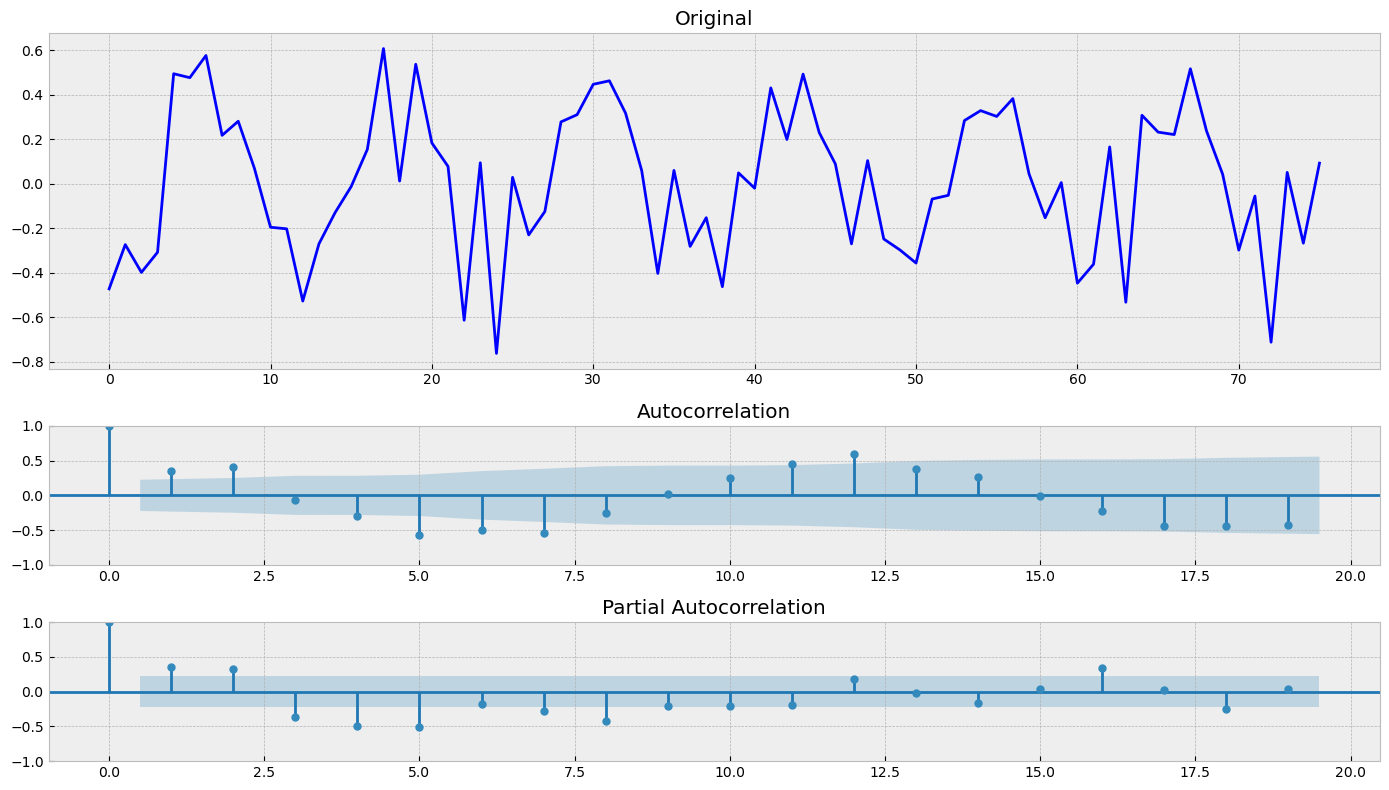

In [231]:
d4.clear_trend()

Test Statistic                -9.899014e+00
p-value                        3.396970e-17
#Lags Used                     1.100000e+01
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64


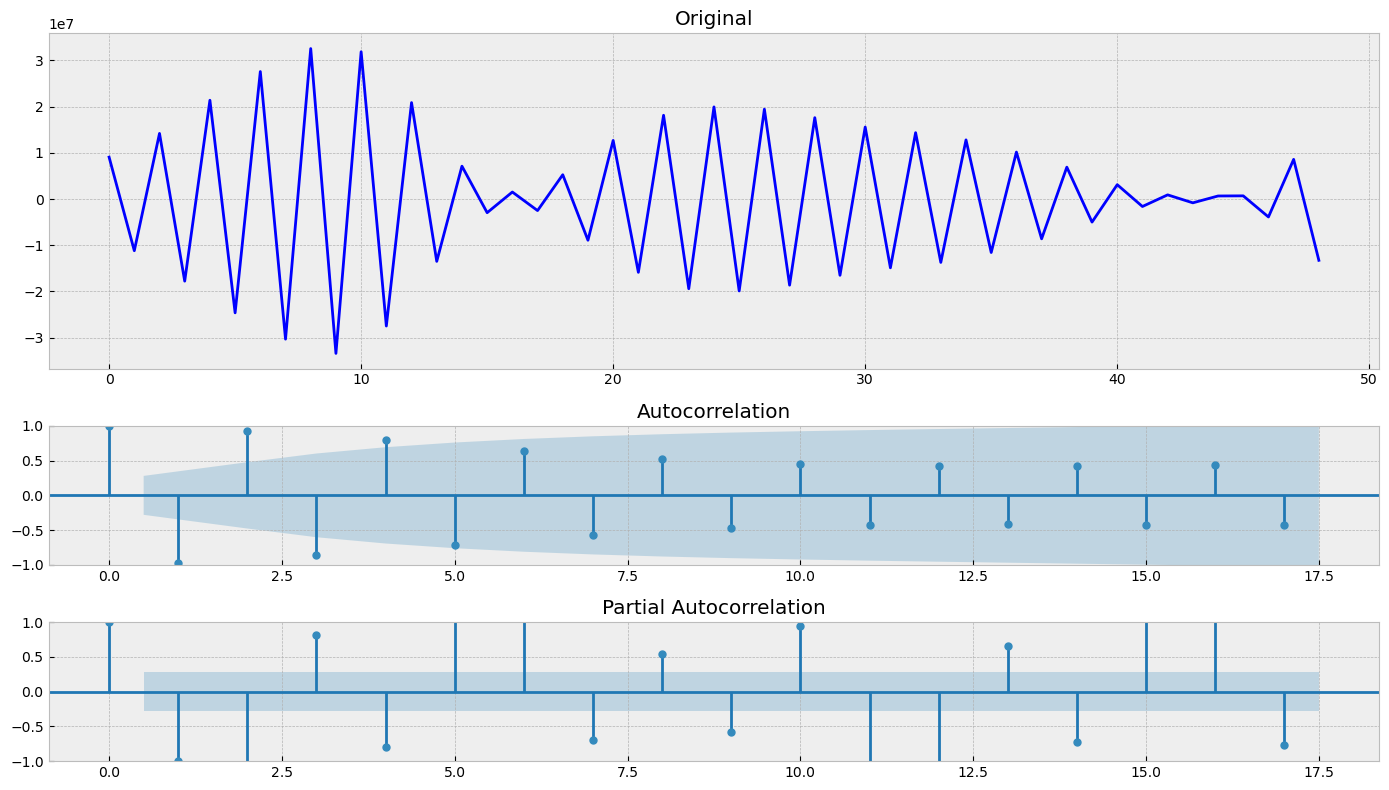

In [233]:
d4.clear_seasonality(15)

# DataSet 5

Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


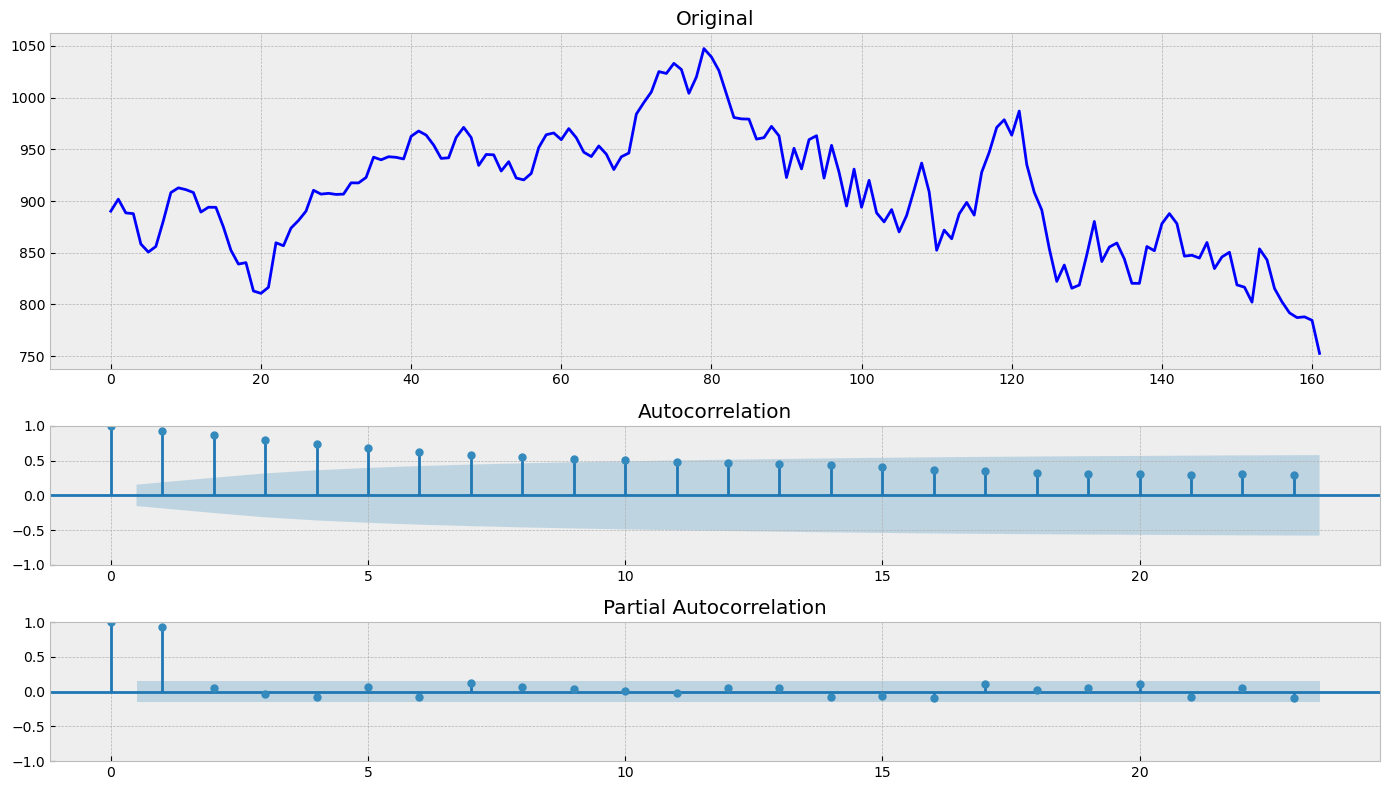

In [240]:
d5 = to_static(5)

In [241]:
d5.norm_Dx()

AssertionError: P-value didnt improve

Test Statistic                -1.742403e+01
p-value                        4.807996e-30
#Lags Used                     1.400000e+01
Number of Observations Used    1.230000e+02
Critical Value (1%)           -3.484667e+00
Critical Value (5%)           -2.885340e+00
Critical Value (10%)          -2.579463e+00
dtype: float64


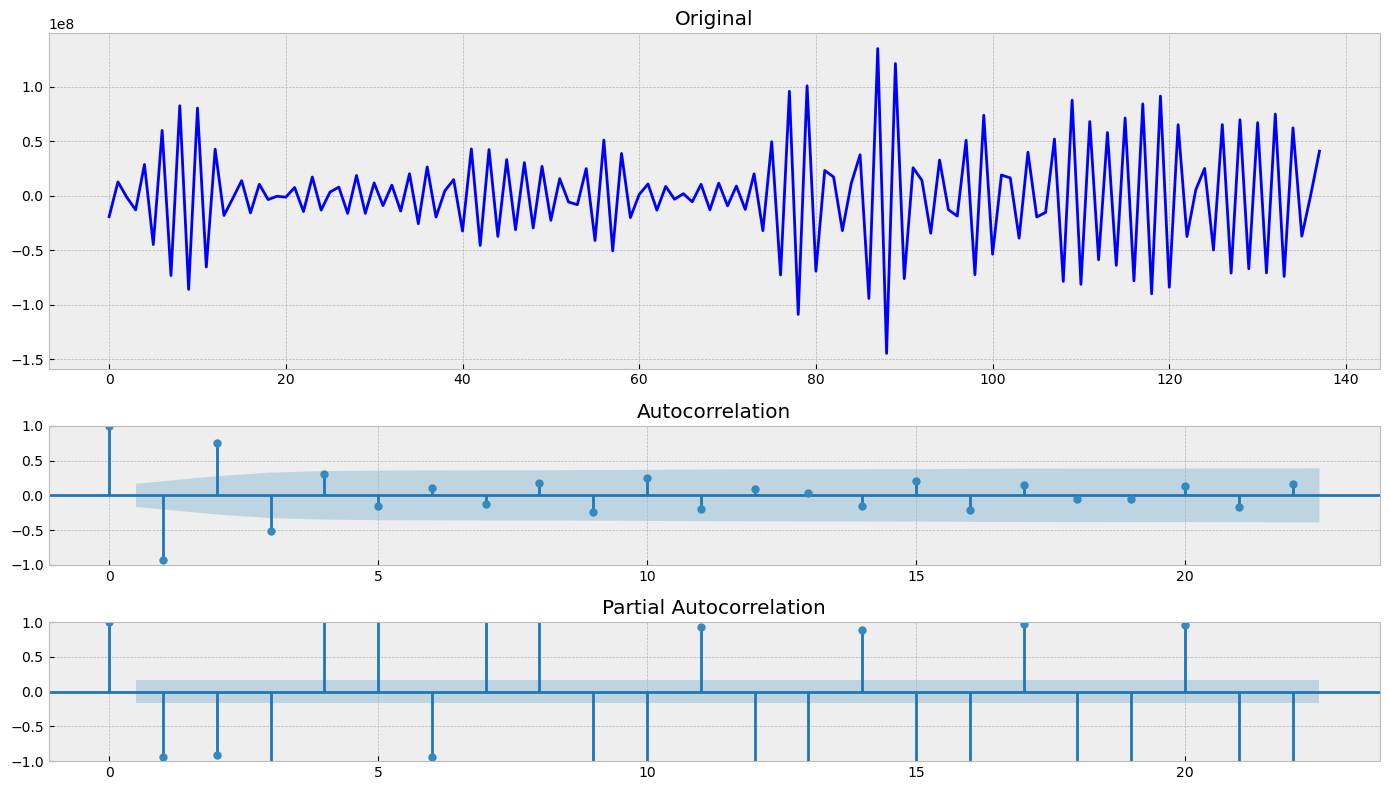

In [242]:
d5.clear_seasonality(24)

Test Statistic                -1.867206e+01
p-value                        2.044385e-30
#Lags Used                     1.300000e+01
Number of Observations Used    1.230000e+02
Critical Value (1%)           -3.484667e+00
Critical Value (5%)           -2.885340e+00
Critical Value (10%)          -2.579463e+00
dtype: float64


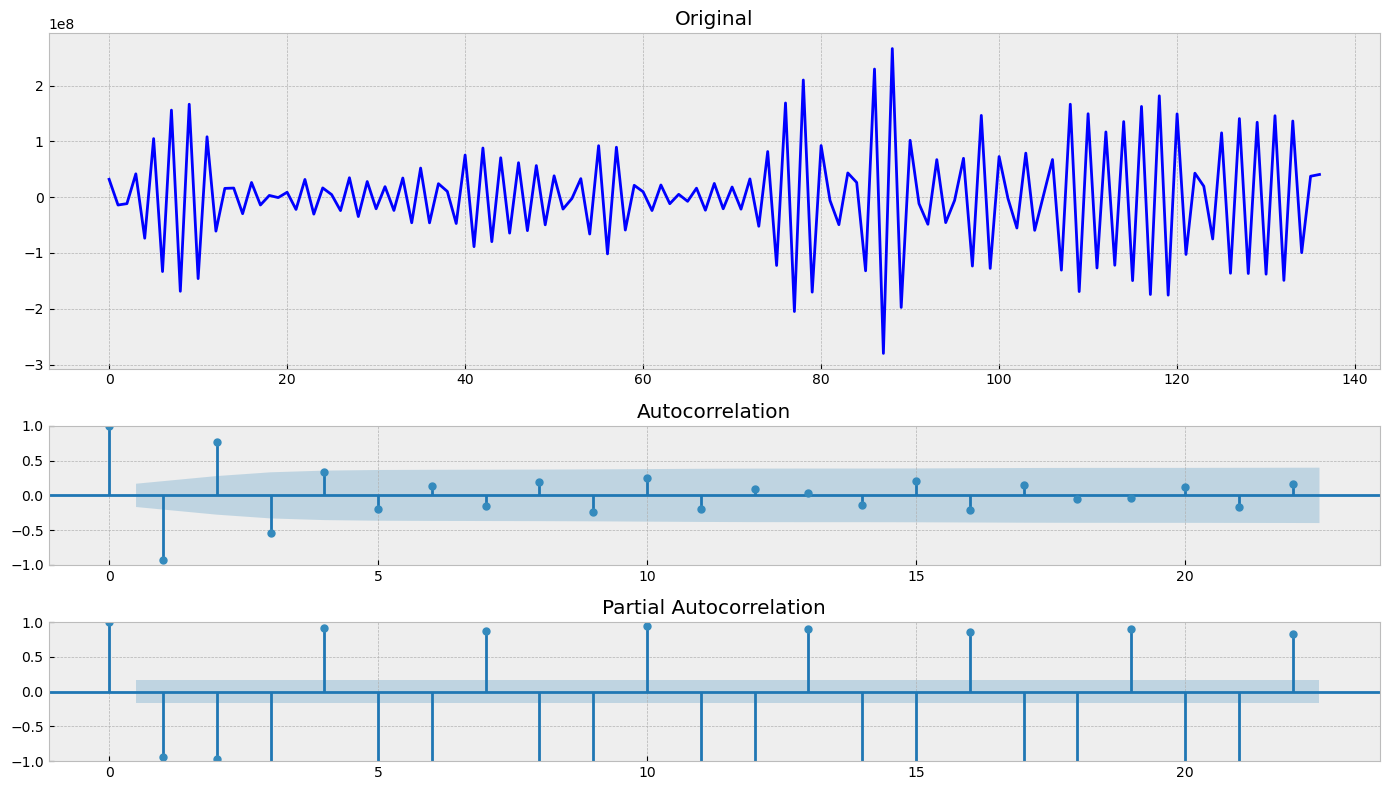

In [243]:
d5.clear_trend()